In [52]:
#Busqueda de cuadricula para clasificación en un modelo de regresión lineal
import pandas as pd
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #la exactitud del algoritmo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import loguniform

In [53]:
datos = pd.read_csv(filepath_or_buffer = "C:/Users/espin/Downloads/diabetes_indiana.csv", sep=',', low_memory=False)


In [54]:
datos

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,0
764,764,2,122,70,27,0,36.8,0.340,27,0
765,765,5,121,72,23,112,26.2,0.245,30,0
766,766,1,126,60,0,0,30.1,0.349,47,1


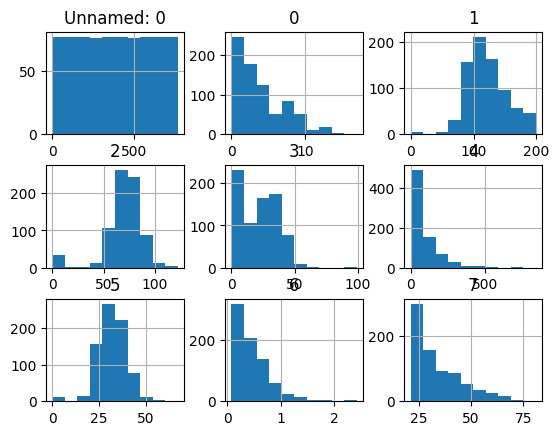

In [55]:
datos.drop(columns='8').hist()
plt.show()

In [56]:
data = datos.values
X, y = data[:, :-1], data[:, -1] # a "x" se le asignan todas las columnas menos la última, y a "y" se le asigna la última columna

In [57]:
data

array([[0.00e+00, 6.00e+00, 1.48e+02, ..., 6.27e-01, 5.00e+01, 1.00e+00],
       [1.00e+00, 1.00e+00, 8.50e+01, ..., 3.51e-01, 3.10e+01, 0.00e+00],
       [2.00e+00, 8.00e+00, 1.83e+02, ..., 6.72e-01, 3.20e+01, 1.00e+00],
       ...,
       [7.65e+02, 5.00e+00, 1.21e+02, ..., 2.45e-01, 3.00e+01, 0.00e+00],
       [7.66e+02, 1.00e+00, 1.26e+02, ..., 3.49e-01, 4.70e+01, 1.00e+00],
       [7.67e+02, 1.00e+00, 9.30e+01, ..., 3.15e-01, 2.30e+01, 0.00e+00]])

In [58]:
print(X.shape, y.shape)

(768, 9) (768,)


In [59]:
X

array([[0.00e+00, 6.00e+00, 1.48e+02, ..., 3.36e+01, 6.27e-01, 5.00e+01],
       [1.00e+00, 1.00e+00, 8.50e+01, ..., 2.66e+01, 3.51e-01, 3.10e+01],
       [2.00e+00, 8.00e+00, 1.83e+02, ..., 2.33e+01, 6.72e-01, 3.20e+01],
       ...,
       [7.65e+02, 5.00e+00, 1.21e+02, ..., 2.62e+01, 2.45e-01, 3.00e+01],
       [7.66e+02, 1.00e+00, 1.26e+02, ..., 3.01e+01, 3.49e-01, 4.70e+01],
       [7.67e+02, 1.00e+00, 9.30e+01, ..., 3.04e+01, 3.15e-01, 2.30e+01]])

In [60]:
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
#Definir el modelo
model = LogisticRegression()

In [63]:
model.fit(X_train,y_train)

C:\Users\espin\uteq\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
predicciones = model.predict(X_test)
print(accuracy_score(y_test, predicciones))

0.7142857142857143


In [65]:
print(confusion_matrix(y_test,predicciones))

[[89 15]
 [29 21]]


In [66]:
# definiendo la evaluacion
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [67]:
# definiendo el espacio de busqueda
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['fit_intercept'] = [True, False]
space['C'] = loguniform(1e-5, 100)
space['tol'] = loguniform(1e-5, 100)
space['warm_start'] = [True, False]

In [68]:
# definiendo la busqueda
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

In [69]:
# ejecutando la busqueda
result = search.fit(X_train, y_train)

C:\Users\espin\uteq\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9600 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
366 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\espin\uteq\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\espin\uteq\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\espin\uteq\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\espin\uteq\lib\site-packages\sklearn\utils\_para

In [70]:
# Mostrando resultados
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7828309536400493
Best Hyperparameters: {'C': 26.383653917976858, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 3.0647258728280384e-05, 'warm_start': False}


In [71]:
#optimización del modelo
modelo = LogisticRegression(C= 1.6082920650521448, penalty= 'l1', solver= 'liblinear', tol= 0.0001932750895357718, warm_start= True )

In [72]:
modelo.fit(X_train,y_train)

LogisticRegression(C=1.6082920650521448, penalty='l1', solver='liblinear',
                   tol=0.0001932750895357718, warm_start=True)

In [73]:
predicciones2 = modelo.predict(X_test)

In [74]:
print(accuracy_score(y_test, predicciones2))

0.7597402597402597


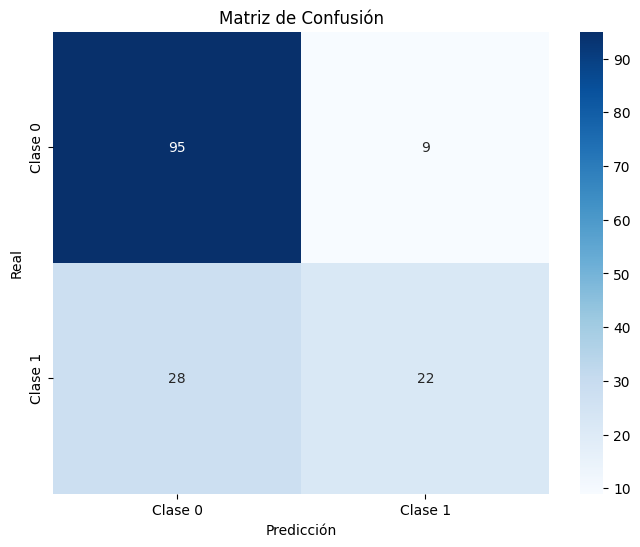

In [76]:
# Visualiza la matriz de confusión como un mapa de calor
cm = confusion_matrix(y_test, predicciones2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()